In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Inisialisasi File

Inisialisasi file bertujuan untuk membaca dataset dan mempersiapkannya untuk analisis. Dataset dalam format CSV dibaca menggunakan pustaka pandas, yang memungkinkan manipulasi data tabular dengan cara yang efisien. Langkah ini esensial untuk memahami struktur data seperti kolom, tipe data, dan distribusi awalnya.

Dataset memiliki target y yang menunjukkan apakah pelanggan berlangganan deposito berjangka. Pemahaman awal menunjukkan adanya variabel numerik dan kategorikal yang perlu dianalisis lebih lanjut.

In [6]:
# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Dataset/bank-full.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path, delimiter=';')

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# Jumlah Baris dan kolom
df.shape

(45211, 17)

In [8]:
# Nama-nama Kolom
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
# Tipe data
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [10]:
# Deskripsi Statistic
df.describe().loc[['min','50%','mean','max','std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
age,18.000000,39.000000,40.936210,95.000000,10.618762
balance,-8019.000000,448.000000,1362.272058,102127.000000,3044.765829
day,1.000000,16.000000,15.806419,31.000000,8.322476
duration,0.000000,180.000000,258.163080,4918.000000,257.527812
campaign,1.000000,2.000000,2.763841,63.000000,3.098021
pdays,-1.000000,-1.000000,40.197828,871.000000,100.128746
previous,0.000000,0.000000,0.580323,275.000000,2.303441


In [11]:
# Melakukan pengecheckan pada nilai NULL
missing_values = df.isnull().sum()
missing_values

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(45211, 17)

Visualisasi Distribusi Variabel Target y

Distribusi variabel target membantu memahami proporsi kelas dalam masalah klasifikasi. Dalam klasifikasi biner, distribusi menunjukkan apakah data seimbang atau tidak, yang memengaruhi pilihan model dan metode evaluasi.

Hasil visualisasi menunjukkan bahwa sebagian besar pelanggan tidak berlangganan deposito berjangka (no). Ketidakseimbangan data ini memerlukan perhatian khusus, seperti penyesuaian metode evaluasi atau penggunaan teknik oversampling.

<ipython-input-27-501fac39fe03>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='viridis')


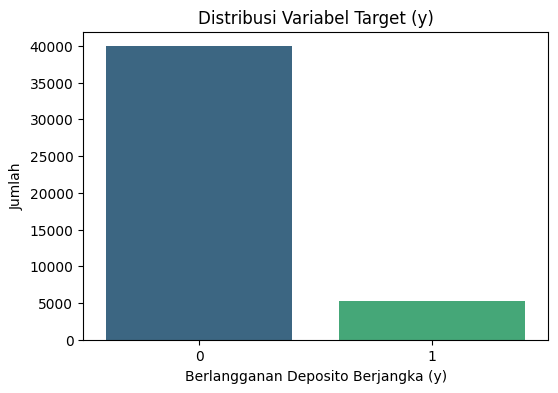

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
numerical_summary = df.describe()

## Visualisasi distribusi variabel target 'y'

plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (y)')
plt.xlabel('Berlangganan Deposito Berjangka (y)')
plt.ylabel('Jumlah')
plt.show()

numerical_summary

Distribusi Umur Berdasarkan Status Berlangganan

Visualisasi distribusi umur memberikan wawasan tentang bagaimana umur pelanggan terkait dengan status berlangganan. Histogram digunakan untuk melihat pola distribusi umur pada masing-masing kelas target.

Pelanggan yang berlangganan (yes) lebih sering ditemukan di kelompok umur tertentu, terutama pada usia produktif (30-60 tahun). Hal ini menunjukkan adanya hubungan antara umur dan kemungkinan berlangganan.

Boxplot

Boxplot adalah alat statistik untuk memvisualisasikan distribusi variabel numerik dan mendeteksi outlier. Membandingkan distribusi saldo antara pelanggan yang berlangganan dan tidak berlangganan dapat menunjukkan tren keuangan.

Pelanggan yang berlangganan umumnya memiliki saldo rata-rata yang lebih tinggi dibandingkan yang tidak. Hal ini menunjukkan bahwa saldo positif dapat menjadi indikator penting untuk menentukan kecenderungan berlangganan.

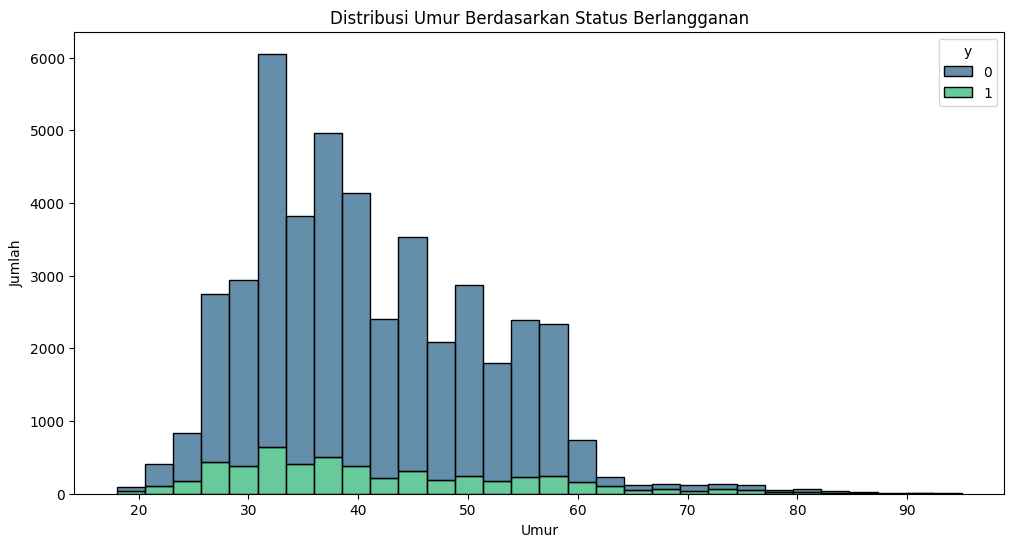

<ipython-input-29-e3fabfd09fa9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='balance', palette='viridis')


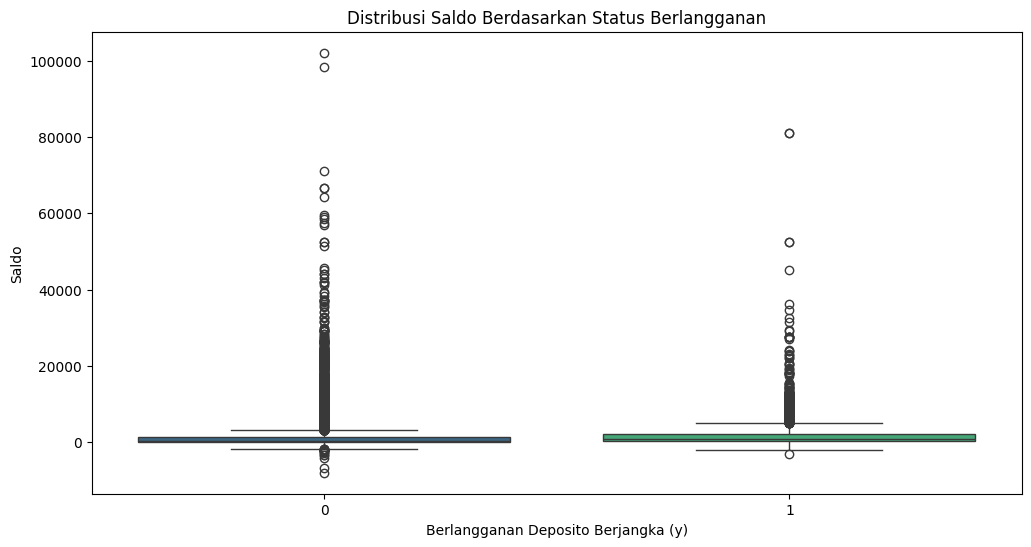

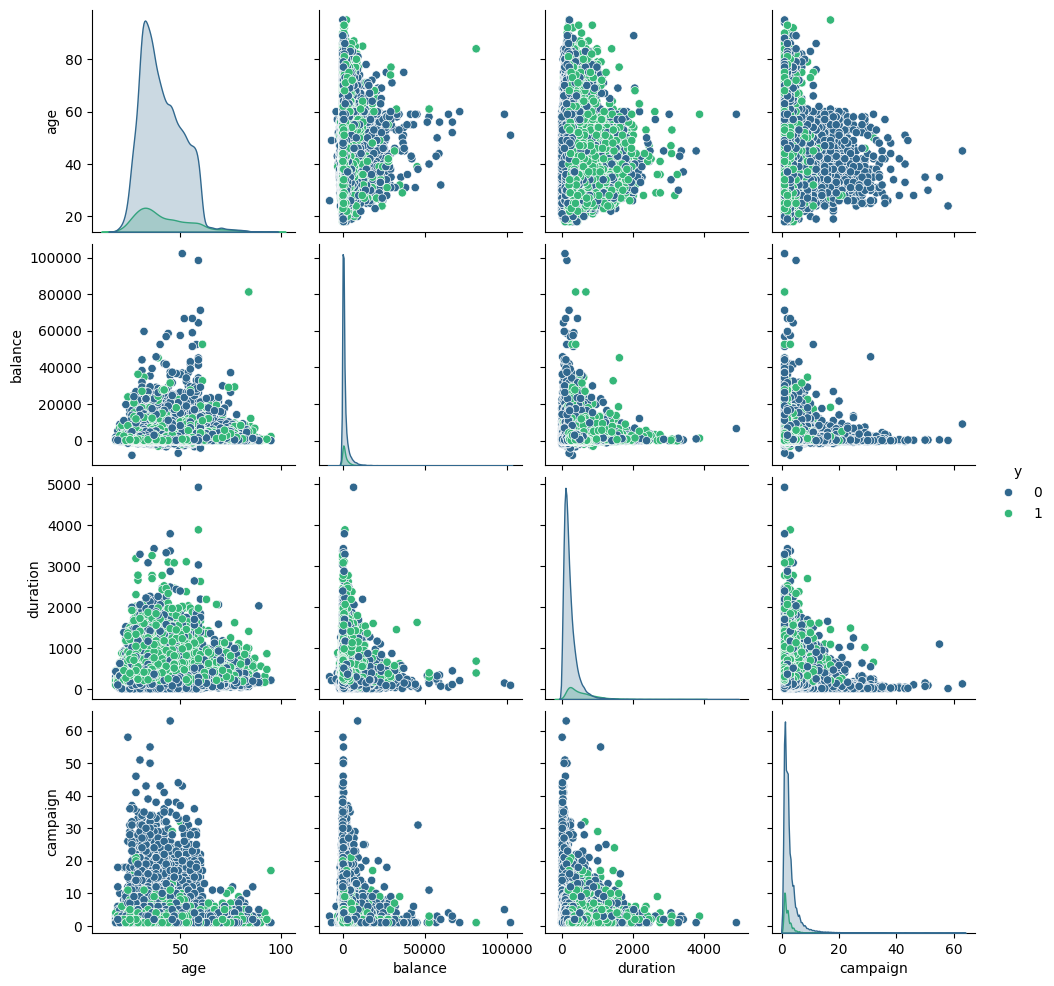

In [29]:
# Distribusi umur berdasarkan status berlangganan

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='y', multiple='stack', bins=30, palette='viridis')
plt.title('Distribusi Umur Berdasarkan Status Berlangganan')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

## Boxplot saldo berdasarkan status berlangganan

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='y', y='balance', palette='viridis')
plt.title('Distribusi Saldo Berdasarkan Status Berlangganan')
plt.xlabel('Berlangganan Deposito Berjangka (y)')
plt.ylabel('Saldo')
plt.show()

# Pairplot for selected numerical variables

selected_features = ['age', 'balance', 'duration', 'campaign']
sns.pairplot(data=df, vars=selected_features, hue='y', palette='viridis')
plt.show()

Pairplot untuk Variabel Numerik yang Dipilih

DPairplot digunakan untuk mengeksplorasi hubungan antar variabel numerik dalam dataset. Ini memungkinkan analisis pola, korelasi, atau kluster berdasarkan warna target.

Scatterplot antar fitur seperti age, balance, dan duration menunjukkan adanya variasi pola untuk pelanggan yang berlangganan. Beberapa variabel seperti duration memiliki pengaruh kuat terhadap klasifikasi.

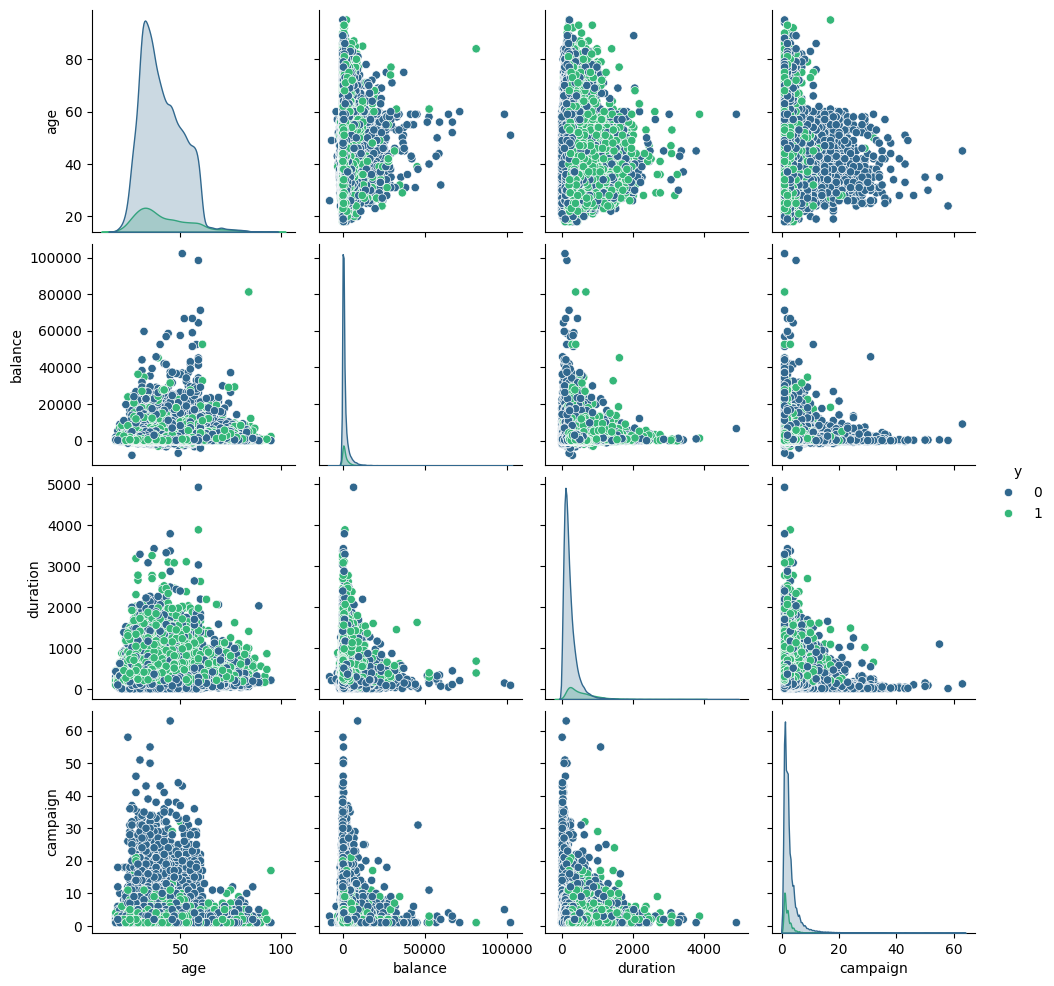

In [30]:

# Memastikan kolom yang dipilih bertipe numerik
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Membuat pairplot untuk variabel numerik yang dipilih
sns.pairplot(data=df, vars=selected_features, hue='y', palette='viridis')

# Menampilkan plot
plt.show()


**Distribusi Durasi Panggilan Berdasarkan Status Berlangganan**

Durasi panggilan adalah variabel yang menggambarkan panjang waktu interaksi pelanggan dengan pemasar. Distribusi durasi membantu memahami bagaimana interaksi panjang memengaruhi keputusan pelanggan.

Pelanggan yang berlangganan (yes) memiliki durasi panggilan yang cenderung lebih panjang. Ini mengindikasikan bahwa waktu yang lebih lama dalam panggilan cenderung meningkatkan kemungkinan pelanggan berlangganan.

**Scatter Plot Umur vs Saldo dengan Pewarnaan Berdasarkan Status Berlangganan**

Scatter plot digunakan untuk melihat pola hubungan antara dua variabel numerik. Pewarnaan berdasarkan target membantu mengidentifikasi pola spesifik untuk masing-masing kelas.

Scatter plot menunjukkan bahwa pelanggan dengan saldo tinggi memiliki kemungkinan lebih besar untuk berlangganan, terutama pada kelompok umur tertentu. Namun, hubungan umur dan saldo tidak selalu linear.

<ipython-input-31-c4b0c6a1eae7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='y', y='duration', palette='viridis')


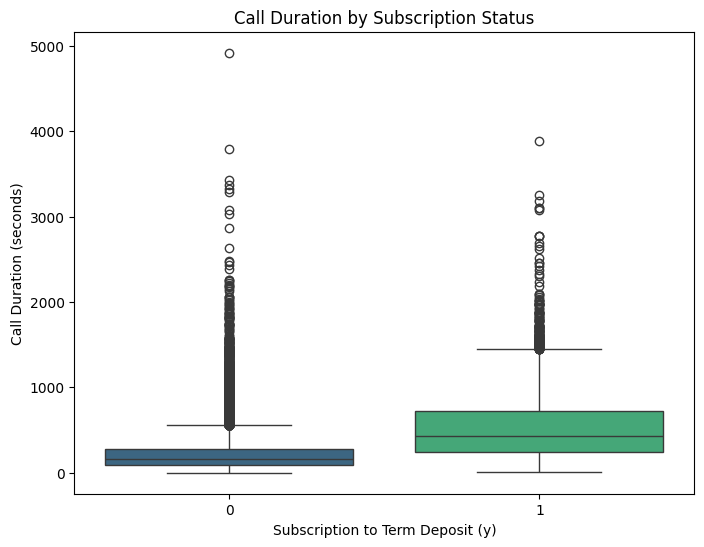

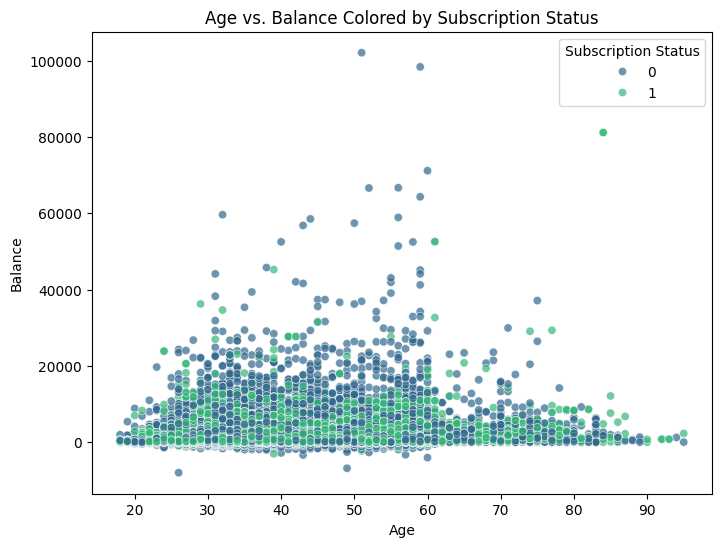

In [31]:
# Distribusi durasi panggilan berdasarkan status berlangganan

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='y', y='duration', palette='viridis')
plt.title('Durasi Panggilan Berdasarkan Status Berlangganan')
plt.xlabel('Berlangganan Deposito Berjangka (y)')
plt.ylabel('Durasi Panggilan (detik)')
plt.show()




# Scatter plot umur vs saldo dengan pewarnaan berdasarkan status berlangganan

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='y', palette='viridis', alpha=0.7)
plt.title('Umur vs Saldo Berdasarkan Status Berlangganan')
plt.xlabel('Umur')
plt.ylabel('Saldo')
plt.legend(title='Status Berlangganan')
plt.show()

**Melatih Logistic Regression, Decision Tree, dan k-NN**

Model klasifikasi seperti Logistic Regression, Decision Tree, dan k-NN digunakan untuk memprediksi apakah pelanggan akan berlangganan. Grid search dan cross-validation digunakan untuk menemukan parameter optimal setiap model.

 Output : logistic Regression menunjukkan performa terbaik dengan parameter regulasi C=10, diikuti oleh Decision Tree dan k-NN. Semua model memiliki akurasi tinggi (>90%), namun perlu diperhatikan bahwa akurasi pada data tidak seimbang dapat menyesatkan. Fitur seperti duration memainkan peran signifikan dalam prediksi.

In [32]:
# Mengimpor pustaka yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Mengubah variabel target menjadi format numerik (label encoding)
df['y'] = LabelEncoder().fit_transform(df['y'])

# Memisahkan fitur dan target
X = df.drop('y', axis=1)
y = df['y']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mendefinisikan fitur numerik dan kategorikal
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Pipeline untuk preprocessing fitur numerik
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Mengisi nilai yang hilang dengan median
    ('scaler', StandardScaler())  # Melakukan standarisasi data
])

# Pipeline untuk preprocessing fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Mengisi nilai yang hilang dengan modus
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Melakukan encoding kategorikal
])

# Menggabungkan pipeline numerik dan kategorikal
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Mendefinisikan model yang akan dievaluasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Grid hyperparameter untuk masing-masing model
param_grids = {
    'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'model__max_depth': [3, 5, 10], 'model__min_samples_split': [2, 5, 10]},
    'k-NN': {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']}
}

# Membuat dictionary untuk menyimpan hasil
results = {}

# Melakukan pencarian grid search untuk setiap model
for model_name, model in models.items():
    print(f"Melatih {model_name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='accuracy', cv=3)
    grid_search.fit(X_train, y_train)

    # Evaluasi model terbaik
    y_pred = grid_search.best_estimator_.predict(X_test)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

results


Melatih Logistic Regression...
Melatih Decision Tree...
Melatih k-NN...


{'Logistic Regression': {'best_params': {'model__C': 10},
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.95      7985\n           1       0.65      0.35      0.45      1058\n\n    accuracy                           0.90      9043\n   macro avg       0.78      0.66      0.70      9043\nweighted avg       0.89      0.90      0.89      9043\n',
  'confusion_matrix': array([[7782,  203],
         [ 689,  369]])},
 'Decision Tree': {'best_params': {'model__max_depth': 5,
   'model__min_samples_split': 2},
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95      7985\n           1       0.65      0.32      0.42      1058\n\n    accuracy                           0.90      9043\n   macro avg       0.78      0.65      0.68      9043\nweighted avg       0.88      0.90      0.88      9043\n',
  'confusion_matrix': array([[7802,  183],
       

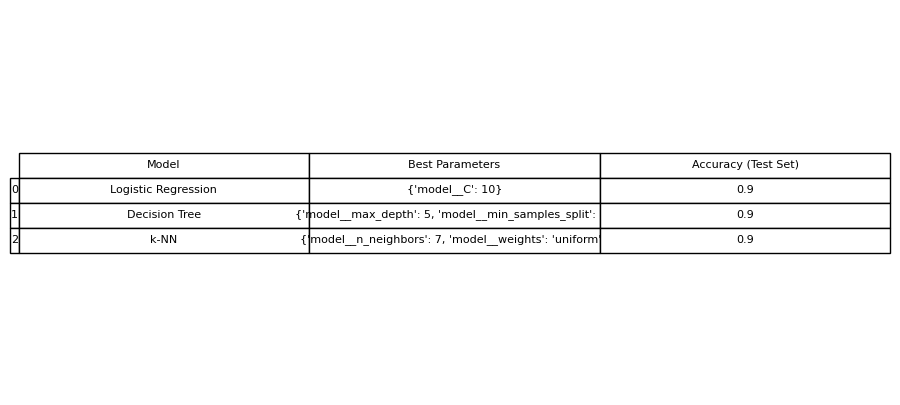

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Mengubah ke DataFrame
results = pd.DataFrame(results)

# Membuat visualisasi tabel
fig, ax = plt.subplots(figsize=(10, 5))  # Menambah ukuran figure
ax.axis('tight')
ax.axis('off')

# Membuat tabel dengan pengaturan skala dan ukuran font
tbl = table(ax, results, loc='center', cellLoc='center', colWidths=[0.25] * len(results.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)  # Ukuran font lebih kecil
tbl.scale(1.5, 1.5)  # Menambah skala tabel agar lebih rapi

# Menampilkan tabel
plt.show()


# Menampilkan tabel sebagai visualisasi
plt.show()

